In [1]:
from datetime import timedelta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_excel("D:/从c盘转移的桌面/github/Inventory Analysis Python Project/online_retail_II2.xlsx",sheet_name='Year 2009-2010')
data2=pd.read_excel("D:/从c盘转移的桌面/github/Inventory Analysis Python Project/online_retail_II2.xlsx",sheet_name='Year 2010-2011')
data=pd.concat([data1,data2],ignore_index=True)

In [3]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [4]:
df_12m=data[(data['InvoiceDate']>'2010-01-01')&(data['InvoiceDate']<='2010-12-31')]
df_12m.columns= ['OrderNo', 'sku', 'Description', 'quantity', 'date_created',
       'UnitPrice', 'CustomerID', 'Country']

In [5]:
df_12m['month']=df_12m.date_created.dt.month
df_12m=df_12m[(df_12m['quantity']>0) & (df_12m['UnitPrice']>0)]
df_12m['revenue']=df_12m['quantity']*df_12m['UnitPrice']
df_12m.info()

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18304\335079520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12m['month']=df_12m.date_created.dt.month


<class 'pandas.core.frame.DataFrame'>
Int64Index: 509089 entries, 45228 to 567941
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   OrderNo       509089 non-null  object        
 1   sku           509089 non-null  object        
 2   Description   509089 non-null  object        
 3   quantity      509089 non-null  int64         
 4   date_created  509089 non-null  datetime64[ns]
 5   UnitPrice     509089 non-null  float64       
 6   CustomerID    403067 non-null  float64       
 7   Country       509089 non-null  object        
 8   month         509089 non-null  int64         
 9   revenue       509089 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 42.7+ MB


In [6]:
df_12m_units=df_12m.groupby(['sku','month'])['quantity'].sum()#each stock quantity every month
df_12m_units=df_12m_units.to_frame().reset_index()
df_12m_units=df_12m_units.pivot(index='sku',columns='month',values='quantity').add_prefix('m').reset_index().fillna(0)
df_12m_units['std_demand'] = df_12m_units[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']].std(axis = 1)

In [7]:
df_12m_units['total_demand']=df_12m_units['m1'] + df_12m_units['m2'] + \
                                                 df_12m_units['m3'] + df_12m_units['m4'] + \
                                                 df_12m_units['m5'] + df_12m_units['m6'] + \
                                                 df_12m_units['m7'] + df_12m_units['m8'] + \
                                                 df_12m_units['m9'] + df_12m_units['m10'] + \
                                                 df_12m_units['m11'] + df_12m_units['m12']

df_12m_units.head()

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand
0,10002,291.0,257.0,642.0,1132.0,1465.0,463.0,512.0,586.0,242.0,1046.0,964.0,411.0,394.661986,8011.0
1,10080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.723281,8.0
2,10120,32.0,5.0,68.0,60.0,4.0,30.0,3.0,0.0,9.0,71.0,75.0,31.0,29.171385,388.0
3,10125,3.0,45.0,110.0,20.0,20.0,64.0,105.0,0.0,65.0,121.0,129.0,199.0,60.665189,881.0
4,10133,162.0,102.0,41.0,45.0,86.0,30.0,72.0,65.0,47.0,104.0,73.0,164.0,44.178272,991.0


In [8]:
df_12m_units['avg_demand']=df_12m_units['total_demand']/12
df_12m_units['cov_demand']=df_12m_units['std_demand']/df_12m_units['avg_demand']


In [9]:
df_12m_units.sort_values(by='cov_demand',ascending=False)

month,sku,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand
813,21649,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.867513,100.0,8.333333,3.464102
117,20715,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.470054,400.0,33.333333,3.464102
2723,16169A,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.216878,25.0,2.083333,3.464102
3059,72739B,304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.757241,304.0,25.333333,3.464102
3369,84706C,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.031833,59.0,4.916667,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,21977,2218.0,2439.0,2376.0,2822.0,2559.0,3223.0,1878.0,3513.0,2836.0,3213.0,3104.0,2288.0,492.174789,32469.0,2705.750000,0.181900
2478,84991,2997.0,3647.0,2878.0,3195.0,3541.0,3385.0,2270.0,3543.0,3043.0,3359.0,2312.0,2097.0,535.445800,36267.0,3022.250000,0.177168
725,21533,185.0,154.0,218.0,201.0,154.0,164.0,153.0,135.0,158.0,139.0,192.0,141.0,26.638432,1994.0,166.166667,0.160312
465,21212,3924.0,4267.0,4643.0,5365.0,4336.0,4684.0,4493.0,4748.0,4668.0,6568.0,5851.0,5694.0,771.287133,59241.0,4936.750000,0.156234


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18304\1208655167.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_12m_units['cov_demand'])


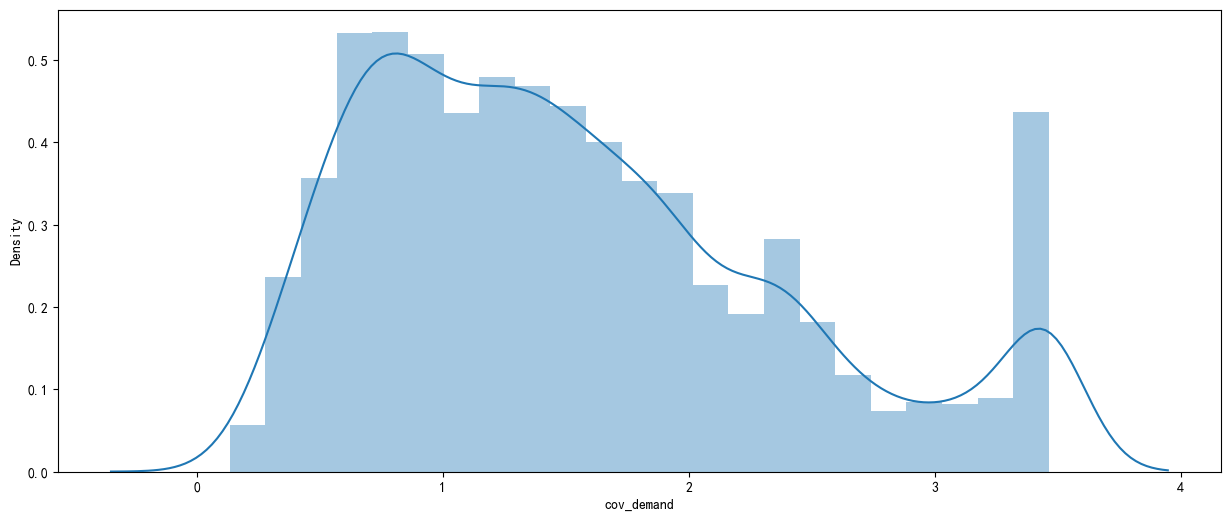

In [10]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
f,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(df_12m_units['cov_demand'])
plt.show()

In [11]:
def xyz_class_product(cov):
       if cov<=0.5:
              return 'X'
       elif cov>0.5 and cov<=1:
              return 'Y'
       else:
              return 'Z'

In [12]:
df_12m_units['xyz_class']=df_12m_units['cov_demand'].apply(xyz_class_product)
df_12m_units['xyz_class'].value_counts()

Z    2796
Y    1027
X     288
Name: xyz_class, dtype: int64

In [13]:
df_12m_units.groupby('xyz_class').agg(
       total_skus=('sku','nunique'),
       total_demand=('total_demand','sum'),
       std_demand=('std_demand','mean'),
       avg_demand=('avg_demand','mean'),
       avg_cov_demand=('cov_demand','mean')
)

,total_skus,total_demand,std_demand,avg_demand,avg_cov_demand
xyz_class,,,,,
X,288,1457031.0,142.168315,421.594618,0.386288
Y,1027,2025709.0,115.210492,164.371065,0.759508
Z,2796,2281447.0,120.888684,67.997347,1.953767


In [14]:
df_monthly=df_12m_units.groupby('xyz_class').agg(
m1=('m1', 'sum'),
    m2=('m2', 'sum'),
    m3=('m3', 'sum'),
    m4=('m4', 'sum'),
    m5=('m5', 'sum'),
    m6=('m6', 'sum'),
    m7=('m7', 'sum'),
    m8=('m8', 'sum'),
    m9=('m9', 'sum'),
    m10=('m10', 'sum'),
    m11=('m11', 'sum'),
    m12=('m12', 'sum'),
)
df_monthly.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
xyz_class,,,,,,,,,,,,
X,110525.0,107031.0,128742.0,121874.0,116987.0,129468.0,115204.0,121216.0,129124.0,130011.0,142829.0,104020.0
Y,104959.0,111910.0,164550.0,163979.0,163033.0,183679.0,147032.0,150508.0,181939.0,220160.0,255685.0,178275.0
Z,176041.0,163841.0,234109.0,82345.0,117186.0,95489.0,76684.0,201696.0,274294.0,271924.0,329935.0,257903.0


In [15]:
df_monthly_unstack=df_monthly.unstack('xyz_class').to_frame().reset_index()
df_monthly_unstack=df_monthly_unstack.rename(columns={'Level_0':'month',0:'demand'})

In [16]:
#ABC types
df_skus = df_12m.groupby('sku').agg(unique_purchases = ('sku','nunique'),total_units=('quantity','sum'),total_revenue = ('revenue','sum'))
df_skus = df_skus.sort_values('total_revenue',ascending =False)

In [17]:
df_skus['revenue_cumsum'] = df_skus['total_revenue'].cumsum()
df_skus['revenue_total'] =  df_skus['total_revenue'].sum()
df_skus['revenue_running_percentage'] = (df_skus['revenue_cumsum']/df_skus['revenue_total'])*100

In [18]:
def abc_class_product(percentage):
       if percentage<=80:
              return 'A'
       elif percentage>80 and percentage<=90:
              return 'B'
       else:
              return 'C'

In [19]:
df_skus['abc_class']=df_skus.revenue_running_percentage.apply(abc_class_product)
df_skus.abc_class.value_counts()

C    2713
A     856
B     542
Name: abc_class, dtype: int64

In [20]:
df_skus=df_skus.reset_index()
df_abc = df_skus.groupby('abc_class').agg(total_skus = ('sku','nunique'),total_units=('total_units','sum'),total_revenue = ('total_revenue','sum')).reset_index()

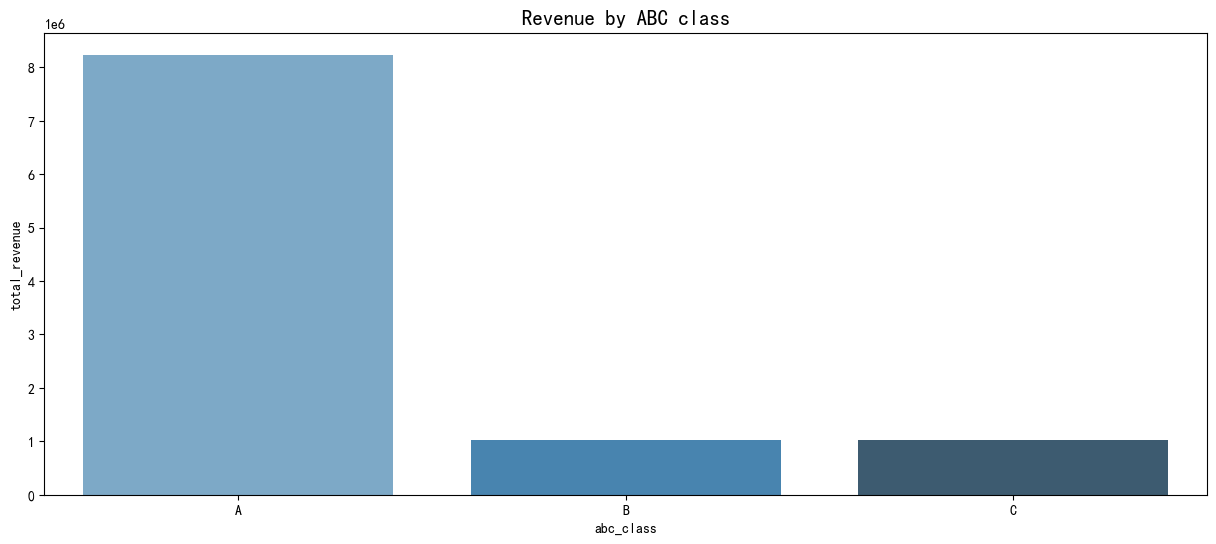

In [21]:
#visulization，abc and their revenue
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_class",
                 y="total_revenue",
                 data=df_abc,
                 palette="Blues_d")\
                .set_title("Revenue by ABC class",fontsize=15)

In [22]:
df_skus['abc_rank']=df_skus['revenue_running_percentage'].rank().astype(int)

In [23]:
df_abc = df_skus[['sku','abc_class','abc_rank','total_revenue']]

In [24]:
df_xyz = df_12m_units.copy()

In [25]:
df_abc_xyz=df_abc.merge(df_xyz,on='sku',how='left')
df_abc_xyz['abc_xyz_class'] = df_abc_xyz['abc_class'].astype(str)+ df_abc_xyz['xyz_class'].astype(str)
df_abc_xyz['abc_xyz_class1'] = df_abc_xyz['abc_class']+ df_abc_xyz['xyz_class']
df_abc_xyz.head()

,sku,abc_class,abc_rank,total_revenue,m1,m2,m3,m4,m5,m6,...,m10,m11,m12,std_demand,total_demand,avg_demand,cov_demand,xyz_class,abc_xyz_class,abc_xyz_class1
0,M,A,1,263219.90,16.0,60.0,733.0,386.0,219.0,331.0,...,118.0,435.0,320.0,205.108988,3004.0,250.333333,0.819343,Y,AY,AY
1,22423,A,2,197948.47,0.0,0.0,751.0,1167.0,540.0,1356.0,...,1965.0,2210.0,3151.0,937.912814,15791.0,1315.916667,0.712745,Y,AY,AY
2,85123A,A,3,151668.63,5486.0,2911.0,5076.0,3702.0,4435.0,4350.0,...,4586.0,6542.0,5576.0,945.632977,55794.0,4649.500000,0.203384,X,AX,AX
3,DOT,A,4,122505.32,46.0,50.0,71.0,62.0,65.0,68.0,...,56.0,59.0,75.0,8.280591,735.0,61.250000,0.135193,X,AX,AX
4,85099B,A,5,86432.43,3572.0,2662.0,3259.0,3947.0,3616.0,4332.0,...,4376.0,6435.0,3569.0,1445.180085,48255.0,4021.250000,0.359386,X,AX,AX


In [26]:
df_abc_xyz_summary = df_abc_xyz.groupby('abc_xyz_class').agg(total_skus = ('sku','nunique'),total_demand=('total_demand','sum'),avg_demand=('avg_demand','mean'),total_revenue = ('total_revenue','sum')).reset_index()
df_abc_xyz_summary.sort_values('total_revenue',ascending =False)

,abc_xyz_class,total_skus,total_demand,avg_demand,total_revenue
1,AY,348,1528028.0,365.907088,3532677.560
2,AZ,317,1046135.0,275.009201,2365108.360
0,AX,191,1318911.0,575.441099,2343885.690
8,CZ,2164,762485.0,29.362485,708884.954
5,BZ,315,472827.0,125.086508,594016.900
4,BY,181,278019.0,128.001381,344828.710
7,CY,498,219662.0,36.757363,277108.440
3,BX,46,85002.0,153.989130,93088.530
6,CX,51,53118.0,86.794118,44726.830


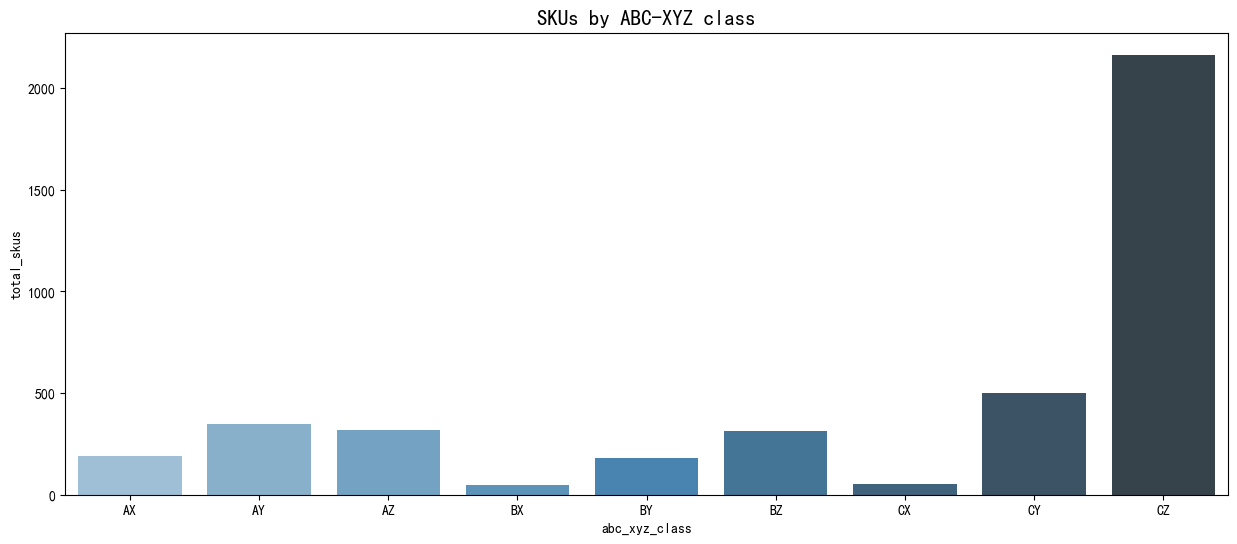

In [27]:
#visulization,abcxyz with their sku
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x="abc_xyz_class",
                 y="total_skus",
                 data=df_abc_xyz_summary,
                 palette="Blues_d")\
                .set_title("SKUs by ABC-XYZ class",fontsize=15)